In [ ]:
from iPPIGAN_lstm import CompoundGenerator
import os
import torch

%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
print(torch.__version__)

In [ ]:
torch.backends.cudnn.enabled = False
my_gen = CompoundGenerator(use_cuda=True)  # set use_cuda=False if you do not have a GPU.

In [3]:
# Load the weights of the models
D_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/D-120000.pkl")
G_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/G-120000.pkl")
encoder_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/encoder-120000.pkl")
decoder_weights =os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/decoder-120000.pkl")
my_gen.load_weight(D_weights, G_weights, encoder_weights, decoder_weights)

In [ ]:
seed_mol = "CC1(C)CCC(CN2CCN(CC2)C2=CC=C(C(=O)NS(=O)(=O)C3=CC=C(NCC4CCOCC4)C(=C3)[N+]([O-])=O)C(OC3=CN=C4NC=CC4=C3)=C2)=C(C1)C1=CC=C(Cl)C=C1"
#mol = AllChem.MolFromPDBFile('./iPPIGAN_lstm/p53pep.pdb')
#seed_mol = Chem.MolToSmiles(mol)
#print(seed_mol)
len(seed_mol)

In [ ]:
gen_mols = my_gen.generate_molecules(seed_mol,
                                     n_attemps=500, # [1, 10000]How many attemps of generations will be carried out
                                     lam_fact=1.,  # [1, 5]Variability factor
                                     probab=True,  # Probabilistic RNN decoding
                                     filter_unique_valid=True)  # Filter out invalids and replicates

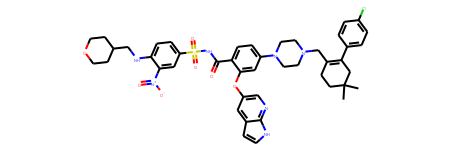

In [6]:
# Seed molecule
Chem.MolFromSmiles(seed_mol)

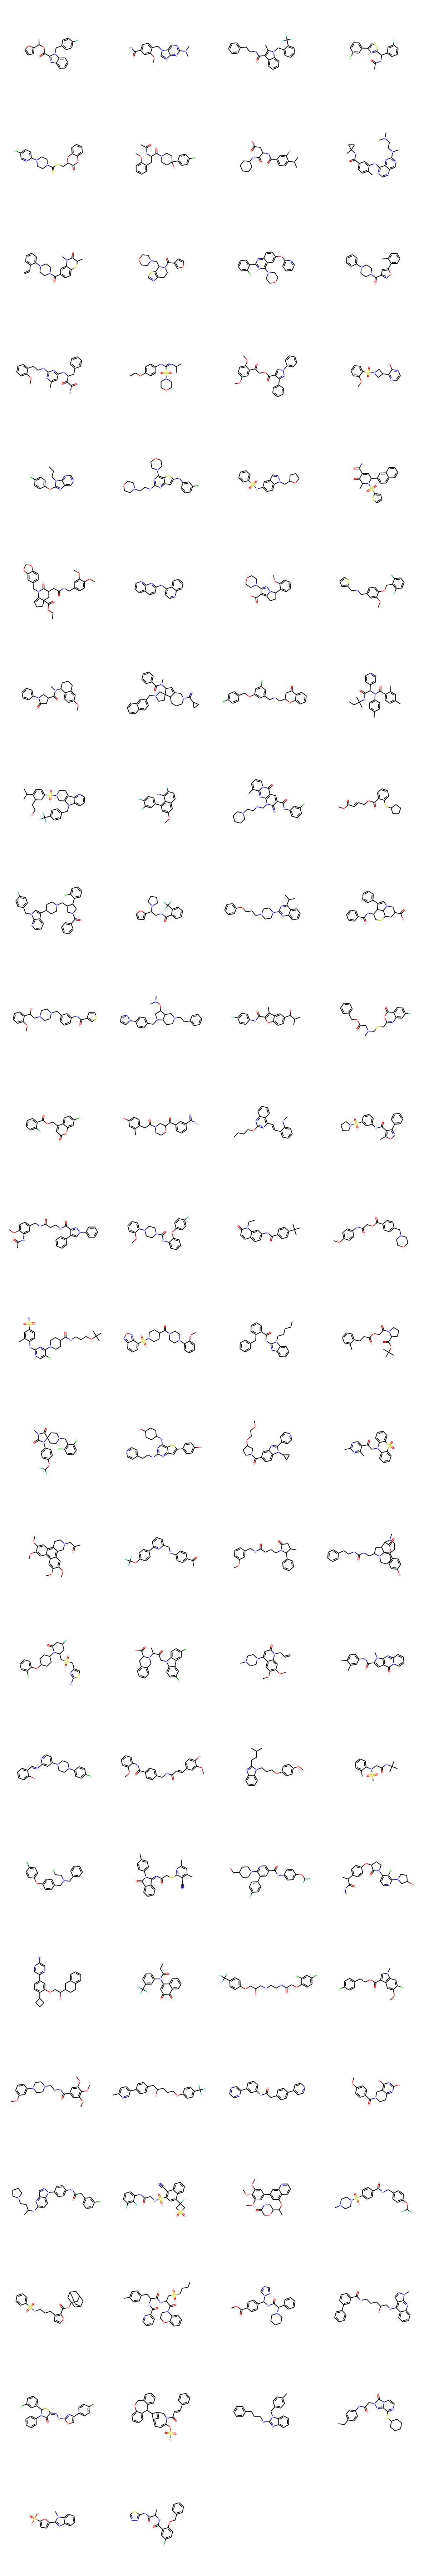

In [7]:
# Generated Molecules
Chem.Draw.MolsToGridImage(gen_mols, molsPerRow=4, subImgSize=(300, 300), maxMols=200)

In [8]:
for i in range(len(gen_mols)):
    smi = Chem.MolToSmiles(gen_mols[i])
    print(smi)

CC(OC(=O)c1nc2ccccc2n1Cc1ccc(F)cc1)c1ccco1
COc1cc(C(N)=O)ccc1Cn1cnc2nc(N(C)C)ncc21
Cc1c(C(=O)NCCc2ccccc2)c2ccccc2n1Cc1ccccc1C(F)(F)F
CC(=O)NC(c1cccc(F)c1)c1nc(-c2cccc(Cl)c2)cs1
O=C1Oc2ccccc2OC1CSC(=S)N1CCN(c2ccc(Cl)cn2)CC1
COc1ccccc1CC(NC(C)=O)C(=O)N1CCC(O)(c2ccc(Cl)cc2)CC1
CC(C)c1ccc(C(=O)NC(CC(=O)O)C(=O)NC2CCCCC2)cc1Br
Cc1ccc(C(=O)NC2(C)CC2)cc1Nc1ncnc2cnc(N(C)CCN(C)C)nc12
C=Cc1ccccc1N1CCN(C(=O)c2ccc3c(c2)N(C)C(=O)C(C)S3)CC1
O=C(c1ccoc1)N1CCc2ncsc2C1CN1CCOCC1
Clc1ccccc1-c1nc(N2CCOCC2)c2cc(Oc3ccccn3)ccc2n1
O=C(c1cc(-c2ccccc2Br)on1)N1CCN(c2ccccc2)CC1
COc1ccccc1CCNc1nc(C)cc(NC(Cc2ccccc2)C(=O)C(N)=O)n1
CCOc1ccc(NC(=NC(C)C)S(=O)(=O)N2CCOCC2)cc1
COc1ccc(OC)c(C(=O)COC(=O)c2cn(-c3ccccc3)nc2-c2ccccc2)c1
COc1ccccc1S(=O)(=O)N1CC(c2nccnc2O)C1
CCCn1c(Oc2ccc(Cl)cc2)nc2cncnc21
Clc1cccc(Nc2cc3nc(NCCN4CCOCC4)nc(N4CCOCC4)c3s2)c1
O=S(=O)(Nc1ccc2c(cnn2CC2CCCO2)c1)c1ccccc1
CC1C(=O)C(C(N)=O)=CC(c2ccc3ccccc3c2)N1S(=O)(=O)c1cccs1
CCOC(=O)C12CCC=C1N(Cc1ccc3c(c1)OCO3)C(=O)C(CC(=O)NCc1ccc(OC)c(OC)c1)C2
c1cnc2nc

In [9]:
with open('./iPPIGAN_lstm/gen_smiles/gen_Bcl2_smiles.csv', 'w') as f:
    for i in range(len(gen_mols)):
        smi = Chem.MolToSmiles(gen_mols[i])
        f.write(smi+"\n")